In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [128]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [129]:
x=data[['Pregnancies','Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [130]:
y=data[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [131]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (537, 8)
y_train: (537, 1)
x_test: (231, 8)
y_test: (231, 1)


In [132]:
inputsize=x_test.shape[1]
ouputsize=y_test.shape[1]
hiddensize=64
learningrate=0.01

In [133]:
class MLP:
    def __init__(self,inputsize,ouputsize,hiddensize,learningrate):
        self.inputsize=inputsize
        self.outputsize=ouputsize
        self.hiddensize=hiddensize
        self.learningrate=learningrate
        self.inputweights=np.random.randn(inputsize,hiddensize)
        self.hiddenweights=np.random.randn(hiddensize,ouputsize)
        self.hiddenbias=np.zeros((1,hiddensize))
        self.outputbias=np.zeros((1,ouputsize))

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self,x):
        return x*(1-x) 
    
    def linear(self,x):
        return x
    
    def linear_derivative(self,x):
        return 1
    
    def forward(self,input):
        self.hiddenoutput=self.linear(np.dot(input,self.inputweights)+self.hiddenbias)
        self.output=self.sigmoid(np.dot(self.hiddenoutput,self.hiddenweights)+self.outputbias)
        return self.output
    
    def backward(self,input,label):
        error=label-self.output
        deltaoutput=error*self.sigmoid_derivative(self.output)
        #(1,5) (1,1) 
        deltahidden=self.linear_derivative(self.hiddenoutput)*np.dot(deltaoutput,self.hiddenweights.T)
        self.hiddenweights+=learningrate*np.dot(self.hiddenoutput.T,deltaoutput) 
        #(8,1) (1,5)
        self.inputweights+=learningrate*np.dot(input.T,deltahidden)
        self.hiddenbias+=learningrate*deltahidden
        self.outputbias+=learningrate*deltaoutput

    def train(self,input,label,epochs=10):
        losses=[]
        for e in range(epochs):
            loss=0
            for row,output in zip(input,label):
                row=row.reshape(1,-1) 
                predicted=self.forward(row)
                loss+=np.mean((output-predicted)**2) 
                self.backward(row,output.reshape(1,-1))
            averageloss=loss/len(input)
            print(f'Loss in epoch {e} was {averageloss:.4f}')
            losses.append(averageloss)
        return losses 
    
    def predict(self,input): 
        predicted=[]
        for row in input:
            row=row.reshape(1,-1) 
            prediction=self.forward(row) 
            if prediction[0]<0.5:
                predicted.append(0)
            elif prediction[0]>=0.5:
                predicted.append(1)
        return np.array(predicted)
    
    def predictprob(self,input): 
        predicted=[]
        for row in input:
            row=row.reshape(1,-1) 
            prediction=self.forward(row) 
            predicted.append(prediction[0])
        return np.array(predicted)

In [146]:
mlp=MLP(inputsize,ouputsize,hiddensize,learningrate) 
loss=mlp.train(np.array(x_train),np.array(y_train))

C:\Users\HP\AppData\Local\Temp\ipykernel_16776\2294316092.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Loss in epoch 0 was 0.4896
Loss in epoch 1 was 0.5121
Loss in epoch 2 was 0.5121
Loss in epoch 3 was 0.5121
Loss in epoch 4 was 0.5121
Loss in epoch 5 was 0.5121
Loss in epoch 6 was 0.5121
Loss in epoch 7 was 0.5121
Loss in epoch 8 was 0.5121
Loss in epoch 9 was 0.5121


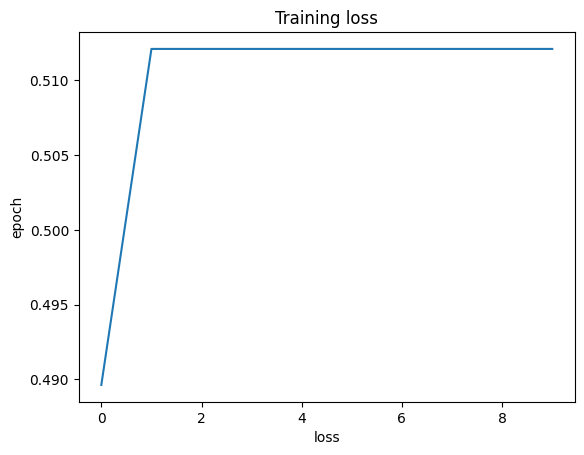

In [147]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.xlabel('loss')
plt.ylabel('epoch')
plt.title('Training loss')
plt.show()

In [148]:
prediction=mlp.predict(np.array(x_test))
print(prediction)

[1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 1 1 0]


C:\Users\HP\AppData\Local\Temp\ipykernel_16776\2294316092.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [149]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(np.array(y_test),prediction))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58       151
           1       0.34      0.47      0.40        80

    accuracy                           0.50       231
   macro avg       0.50      0.50      0.49       231
weighted avg       0.54      0.50      0.51       231



In [150]:
print(confusion_matrix(np.array(y_test),prediction))

[[78 73]
 [42 38]]


C:\Users\HP\AppData\Local\Temp\ipykernel_16776\2294316092.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


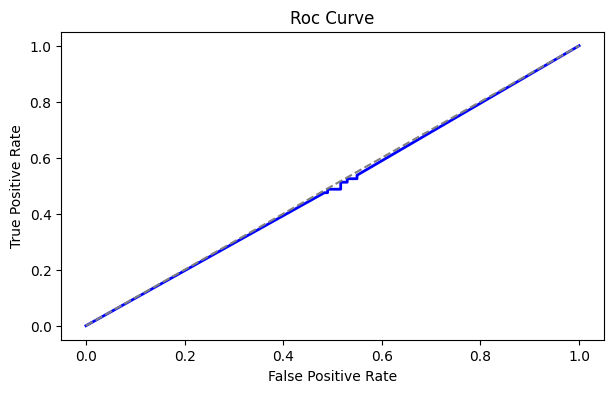

In [151]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

pred_prob=mlp.predictprob(np.array(x_test))

fpr,tpr,_=roc_curve(np.array(y_test),pred_prob)
roc_auc = roc_auc_score(np.array(y_test),pred_prob)

plt.figure(figsize=(7,4))
plt.plot(fpr,tpr,color='Blue',lw=2) 
plt.plot([0, 1],[0, 1],color='grey',linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Roc Curve')
plt.show()